# #004_DL_1

## Tensorflow 2.0 beta

### 이미지 데이터 분류하기 

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

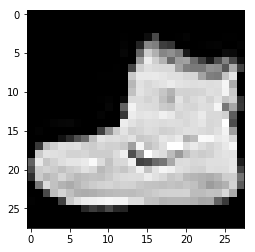

In [14]:
plt.imshow(X_train[0], cmap='gray')

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0 #데이터 학습을 위해 0과 1 사이의 값으로 normalize 했다.

 - activation이 없는 경우 : 리그레이션, dropout, inputlayer, 

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #== .reshape을 이용하기
    tf.keras.layers.Dense(512, activation=tf.nn.relu), #== 'relu'
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [18]:
model.fit(X_train, y_train, epochs=5)

W0626 14:22:35.639631 4517230016 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4733 - acc: 0.8306
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3585 - acc: 0.8674
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3210 - acc: 0.8812
Epoch 4/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2974 - acc: 0.8894
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2800 - acc: 0.8960


In [19]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3530 - acc: 0.8707


[0.3529632986545563, 0.8707]

In [23]:
predictions = model.predict(X_test)
predictions[0] #softmax기 때문에 10개의 확률이 나오고 그 중 가장 높은 index가 예측값이다.

array([2.8920178e-07, 1.1352495e-08, 9.9980770e-09, 4.8665039e-10,
       1.4928380e-08, 2.8459015e-04, 1.6056916e-07, 1.4004960e-02,
       1.0049191e-06, 9.8570895e-01], dtype=float32)

---

 - 학습한 모델에 맞춰서 예측값도 들어가야한다. 따라서 test 데이터도 형태를 변경해줘야한다.

In [24]:
import numpy as np

In [28]:
X_test[0].shape

(28, 28)

In [29]:
X_test[0][np.newaxis].shape

(1, 28, 28)

In [30]:
np.expand_dims(X_test[0],0).shape 

(1, 28, 28)

---

### 텍스트 데이터 분류하기

 - tensorflow_hub : Transfor leaning을 지원하는 기능

In [45]:
!pip install -q tensorflow-hub #설치할때는 -, 사용할때는 _

In [47]:
!pip install -q tensorflow-datasets 

In [48]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [49]:
print('version : ', tf.__version__)
print('early start mode : ',tf.executing_eagerly())
print('hub version : ',hub.__version__)
print('GPU','Able' if tf.test.is_gpu_available() else 'Disable')

version :  2.0.0-beta1
early start mode :  True
hub version :  0.5.0
GPU Disable


In [50]:
dir(tfds)

['GenerateMode',
 'Split',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'as_numpy',
 'audio',
 'builder',
 'core',
 'disable_progress_bar',
 'division',
 'download',
 'features',
 'file_adapter',
 'image',
 'is_dataset_on_gcs',
 'list_builders',
 'load',
 'percent',
 'print_function',
 'public_api',
 'structured',
 'testing',
 'text',
 'tf_compat',
 'translate',
 'units',
 'version',
 'video']

In [51]:
dir(tfds.Split)

['ALL',
 'TEST',
 'TRAIN',
 'VALIDATION',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [52]:
dir(tfds.Split.TRAIN)

['__abstractmethods__',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_name',
 'get_read_instruction',
 'subsplit']

In [53]:
train_validation_split = tfds.Split.TRAIN.subsplit([6,4]) #훈련세트를 6대4로 나눈다.

#holdout기법(train 데이터를 한번 더 쪼갠다.)
(train_data, validation_data), test_data = tfds.load(
    name='imdb_reviews',
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True #내부적으로 X,Y를 쪼개준다.
)

W0626 14:57:36.215512 4517230016 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/pd/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [64]:
train_data

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [62]:
dir(train_data)

['_GeneratorState',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_component_metadata',
 '_consumers',
 '_deferred_dependencies',
 '_element_structure',
 '_from_components',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_is_graph_tensor',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_maybe_initialize_trackable',
 '_name_base

 - batch : 데이터를 묶어서 학습시킬 때 사용하는 단위

In [63]:
train_data.batch(10)

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [66]:
for i in train_data.batch(10):
    print(i)

(<tf.Tensor: id=71273, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the stor

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
len(train_data.batch(10)) # 유동적으로 사이즈가 변경되기 때문에 길이를 구할수 없다.

TypeError: object of type 'BatchDataset' has no len()

In [69]:
iter(train_data.batch(10))

In [77]:
train_example_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [78]:
train_example_batch 
#tf.Tensor : 텐서플로우의 기본적인 데이터 구조, 근본적으로는 numpy로 되어있지만 gpu를 추가로 지원한다.

<tf.Tensor: id=77326, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story

In [79]:
train_example_batch.numpy #Tensor로 감싸져있지만, .numpy로 접근할 수 있다.

<bound method _EagerTensorBase.numpy of <tf.Tensor: id=77326, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is j

In [76]:
train_labels_batch

<tf.Tensor: id=77312, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

 - 데이터를 학습시켜야하기 때문에, train_example_batch를 int값으로 변환시켜야 한다.

#### Transfor learning : 기존의 모델을 불러와 새로운 데이터를 학습시켜서 비용을 줄인다.

In [82]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, 
                           input_shape=[], 
                           dtype=tf.string, #Tensorflow에서 사용하는 데이터 형태(numpy에는 없다)
                           trainable=True)
hub_layer(train_example_batch[:3])
#KerasLayer : Keras의 데이터와 Tensorflow의 데이터를 묶어주기 위한 기능

<tf.Tensor: id=77673, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

##### - 모델 변경

 - 모든 모델이 잘맞는것이 아니기 때문에 여러 모델을 테스트 해봐야한다.

In [83]:
model = tf.keras.Sequential()
model.add(hub_layer) #기존의 만들어진 모델을 추가한다.
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [86]:
histroy = model.fit(train_data.shuffle(10000).batch(512),#10000개 섞어서 512개 학습시킨다.
                    epochs=5,
                    validation_data=validation_data.batch(512)
                   )

Epoch 1/5
30/30 [==============================] - 3s 112ms/step - loss: 0.4615 - acc: 0.8048 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/5
30/30 [==============================] - 3s 107ms/step - loss: 0.4277 - acc: 0.8231 - val_loss: 0.4356 - val_acc: 0.8075
Epoch 3/5
30/30 [==============================] - 3s 109ms/step - loss: 0.3964 - acc: 0.8372 - val_loss: 0.4115 - val_acc: 0.8201
Epoch 4/5
30/30 [==============================] - 3s 110ms/step - loss: 0.3667 - acc: 0.8505 - val_loss: 0.3899 - val_acc: 0.8306
Epoch 5/5
30/30 [==============================] - 3s 111ms/step - loss: 0.3396 - acc: 0.8638 - val_loss: 0.3711 - val_acc: 0.8387


 - fit이 달라진 이유 : tensor 포맷을 사용하기 때문

In [87]:
result = model.evaluate(test_data.batch(512))

     49/Unknown - 2s 49ms/step - loss: 0.3846 - acc: 0.8334

---

### 정형 데이터 분류하기

In [88]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [98]:
URL = 'https://storage.googleapis.com/applied-dl/heart.csv'
dataframe = pd.read_csv(URL)
dataframe.info()
dataframe.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 33.2+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
176,66,1,4,112,212,0,2,132,1,0.1,1,1,normal,1
54,68,1,3,180,274,1,2,150,1,1.6,2,0,reversible,1
173,47,1,4,112,204,0,0,143,0,0.1,1,0,normal,0
78,62,0,4,124,209,0,0,163,0,0.0,1,0,normal,0
241,59,1,4,164,176,1,2,90,0,1.0,2,2,fixed,1


In [99]:
dataframe.thal.value_counts()

normal        168
reversible    115
fixed          18
1               1
2               1
Name: thal, dtype: int64

In [105]:
train, test = train_test_split(dataframe, test_size = 0.2)
train, val = train_test_split(train, test_size = 0.2)

print(len(train))
print(len(val))
print(len(test))

193
49
61


In [103]:
# 판다스 데이터프레임으로부터 tf.data 데이터셋을 만들기 위한 함수
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy() 
  labels = dataframe.pop('target') #dataframe.target은 view방식이기 때문에 .copy를 붙이거나 .pop 시켜야한다.
    
  #기존 pandas 포맷의 데이터를 가지고 numpy 포맷으로 변환한다.  
  #pandas -> tensor
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) 
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [104]:
#Tensorflow는 scikit처럼 pandas 데이터를 지원하지 않기 때문에 numpy로 변경하는 작업이 필요하다.

batch_size = 5 # 예제를 위해 작은 배치 크기를 사용합니다.
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [107]:
dict(dataframe) #index가 남아서 keras에 학습시킬 수 없다.

{'age': 0      63
 1      67
 2      67
 3      37
 4      41
 5      56
 6      62
 7      57
 8      63
 9      53
 10     57
 11     56
 12     56
 13     44
 14     52
 15     57
 16     48
 17     54
 18     48
 19     49
 20     64
 21     58
 22     58
 23     58
 24     60
 25     50
 26     58
 27     66
 28     43
 29     40
        ..
 273    46
 274    58
 275    54
 276    54
 277    60
 278    60
 279    54
 280    59
 281    46
 282    59
 283    60
 284    52
 285    48
 286    45
 287    34
 288    57
 289    71
 290    49
 291    54
 292    59
 293    57
 294    61
 295    39
 296    61
 297    56
 298    52
 299    43
 300    65
 301    48
 302    63
 Name: age, Length: 303, dtype: int64, 'sex': 0      1
 1      1
 2      1
 3      1
 4      0
 5      1
 6      0
 7      0
 8      1
 9      1
 10     1
 11     0
 12     1
 13     1
 14     1
 15     1
 16     1
 17     1
 18     0
 19     1
 20     1
 21     0
 22     1
 23     1
 24     1
 25     0
 26     0
 27    

In [108]:
dataframe.values #각 칼럼의 의미가 사라진다.

array([[63, 1, 1, ..., 0, 'fixed', 0],
       [67, 1, 4, ..., 3, 'normal', 1],
       [67, 1, 4, ..., 2, 'reversible', 0],
       ...,
       [65, 1, 4, ..., 1, 'reversible', 1],
       [48, 1, 4, ..., 2, 'reversible', 1],
       [63, 0, 4, ..., 3, 'reversible', 1]], dtype=object)

In [109]:
#dict()를 이용해서 변환했기 때문에 데이터의 의미를 가지고 있는다.
for feature_batch, label_batch in train_ds.take(1):
  print('전체 특성:', list(feature_batch.keys()))
  print('나이 특성의 배치:', feature_batch['age'])
  print('타깃의 배치:', label_batch )

전체 특성: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
나이 특성의 배치: tf.Tensor([67 67 65 41 42], shape=(5,), dtype=int32)
타깃의 배치: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int32)


In [110]:
# 특성 열을 시험해 보기 위해 샘플 배치를 만듭니다.
example_batch = next(iter(train_ds))[0]

In [111]:
# 특성 열을 만들고 배치 데이터를 변환하는 함수
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

In [112]:
age = feature_column.numeric_column("age") #칼럼의 의미를 지니고 있다.(numpy에서 하려면 slicing 해야한다.)
demo(age)

[[67.]
 [67.]
 [65.]
 [41.]
 [42.]]


In [113]:
feature_columns = []

# 수치형 열
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
  feature_columns.append(feature_column.numeric_column(header))

# 버킷형 열
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# 범주형 열
thal = feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])
thal_one_hot = feature_column.indicator_column(thal) #바로 ohe를 실행해준다.
feature_columns.append(thal_one_hot)

# 임베딩 열
thal_embedding = feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# 교차 특성 열
crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
crossed_feature = feature_column.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [116]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model.fit(train_ds,
#           validation_data=val_ds,
#           epochs=5)

#### - pandas의 데이터 형태가 바뀌게 되었을 때, tensor로 변경해주는 tf.data.dataset만 변경하면 된다.

---

### 회귀 데이터 예측하기

```python
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]), #pandas의 컬럼갯수를 가져온다.
    layers.Dense(64, activation='relu'),
    layers.Dense(1) #회귀 분석 데이터이기 때문에 값이 나온다. 따라서 activation을 넣지 않는다.
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
```

```python
#학습 히스토리를 pandas형태로 저장해 통계를 구할 수 있다.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
```

---

In [117]:
import seaborn as sns
mpg = sns.load_dataset('mpg')
dict(mpg)

{'mpg': 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
 5      15.0
 6      14.0
 7      14.0
 8      14.0
 9      15.0
 10     15.0
 11     14.0
 12     15.0
 13     14.0
 14     24.0
 15     22.0
 16     18.0
 17     21.0
 18     27.0
 19     26.0
 20     25.0
 21     24.0
 22     25.0
 23     26.0
 24     21.0
 25     10.0
 26     10.0
 27     11.0
 28      9.0
 29     27.0
        ... 
 368    27.0
 369    34.0
 370    31.0
 371    29.0
 372    27.0
 373    24.0
 374    23.0
 375    36.0
 376    37.0
 377    31.0
 378    38.0
 379    36.0
 380    36.0
 381    36.0
 382    34.0
 383    38.0
 384    32.0
 385    38.0
 386    25.0
 387    38.0
 388    26.0
 389    22.0
 390    32.0
 391    36.0
 392    27.0
 393    27.0
 394    44.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 398, dtype: float64, 'cylinders': 0      8
 1      8
 2      8
 3      8
 4      8
 5      8
 6      8
 7      8
 8      8
 9      8
 10     8
 11     8
 12     8
 13     8
 14    

In [122]:
mpg.keys() #== mpg.columes

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [125]:
mpg.keys() == mpg.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [124]:
all(mpg.keys() == mpg.columns)

True

In [127]:
np.alltrue([True,True])

True

---

### 오버피팅

#### - 레귤라이제이션 : 오버피팅을 방지하기위해 가중치의 변화를 규제해서 bias가 급격히 떨어지는 경우를 방지한다. -> 오버피팅이 일어나는 지점을 미뤄준다.
     - L1 : 정사각형의 형태로 제한한다.
     - L2 : 원형의 형태로 제한한다.

```python
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), #오버피팅을 미루기 위해 제한을 추가한다.
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
```

#### - Dropout : 랜덤하게 몇개의 원소를 0으로 만든다.

```python
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5), #적용하고자 layer하단에 적용시킨다.
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
```

---

### 데이터 저장 및 불러오기

 - 활용 방법
     - tensorflow.js에 모델 적용시키기
     - 학습시킨 모델 및 가중치 불러오기
     - 트랜스펄 러닝을 사용할 수 있다.

---

### tf.data overview

In [128]:
dir(tf.data)

['Dataset',
 'FixedLengthRecordDataset',
 'Options',
 'TFRecordDataset',
 'TextLineDataset',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'experimental']

In [130]:
type(tf.data.Dataset)

abc.ABCMeta

In [131]:
dir(tf.data.Dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_component_metadata',
 '_consumers',
 '_deferred_dependencies',
 '_element_structure',
 '_from_components',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_inputs',
 '_is_graph_tensor',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_maybe_initialize_trackable',
 '_name_based_attribute_restore',
 '_name_based

In [136]:
tf.data.Dataset.range(10)

<RangeDataset shapes: (), types: tf.int64>

In [146]:
for i in tf.data.Dataset.range(10):
    print(type(i.numpy),'값:',i.numpy)

<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86309, shape=(), dtype=int64, numpy=0>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86311, shape=(), dtype=int64, numpy=1>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86313, shape=(), dtype=int64, numpy=2>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86315, shape=(), dtype=int64, numpy=3>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86317, shape=(), dtype=int64, numpy=4>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86319, shape=(), dtype=int64, numpy=5>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86321, shape=(), dtype=int64, numpy=6>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86323, shape=(), dtype=int64, numpy=7>>
<class 'method'> 값: <bound method _EagerTensorBase.numpy of <tf.Tensor: id=86325

In [154]:
n = np.zeros([2,3])
n

array([[0., 0., 0.],
       [0., 0., 0.]])

In [156]:
t = tf.zeros(2,3)
t

<tf.Tensor: id=86346, shape=(2,), dtype=int32, numpy=array([0, 0], dtype=int32)>